In [1]:
# 윈도우
%matplotlib notebook
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib.font_manager import fontManager
import squarify
import matplotlib

for font in fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name)
        
warnings.filterwarnings(action='ignore')
plt.rc('font', family='')
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
gs=pd.read_csv("C:/Users/user/공모전/gs.csv",encoding='cp949',parse_dates=['date.gs'])

In [7]:
for font in fontManager.ttflist:
    if 'Mal' in font.name:
        print(font.name)
warnings.filterwarnings(action='ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

Malgun Gothic
Malgun Gothic
Malgun Gothic


In [15]:
for font in fontManager.ttflist:
    if 'Na' in font.name:
        print(font.name)

Adobe Naskh
08SeoulNamsan
SeoulNamsan CEB
SeoulNamsan CBL
SeoulNamsan CM
08SeoulNamsan
SeoulNamsan CB
08SeoulNamsan
08SeoulNamsan
08SeoulNamsan
SeoulNamsan CL


In [1]:
#맥
import pandas as pd
import warnings
import numpy as np
import os
import matplotlib
from scipy import stats
from matplotlib.image import imread
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import squarify 
from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore')

os.chdir('/Users/hankiho/Downloads/weather-master/유통&소셜 데이터')

In [4]:
weather = pd.read_csv("weather.csv", encoding ='CP949', parse_dates=['date.wt'])
gs = pd.read_csv("gs.csv", encoding ='CP949', parse_dates=['date.gs'])
la = pd.read_csv("lala.csv", encoding ='CP949', parse_dates=['date.la'])
gs_seoul = gs[gs['reg_01.gs']=='서울특별시']

ppt) p4 

<IPython.core.display.Javascript object>


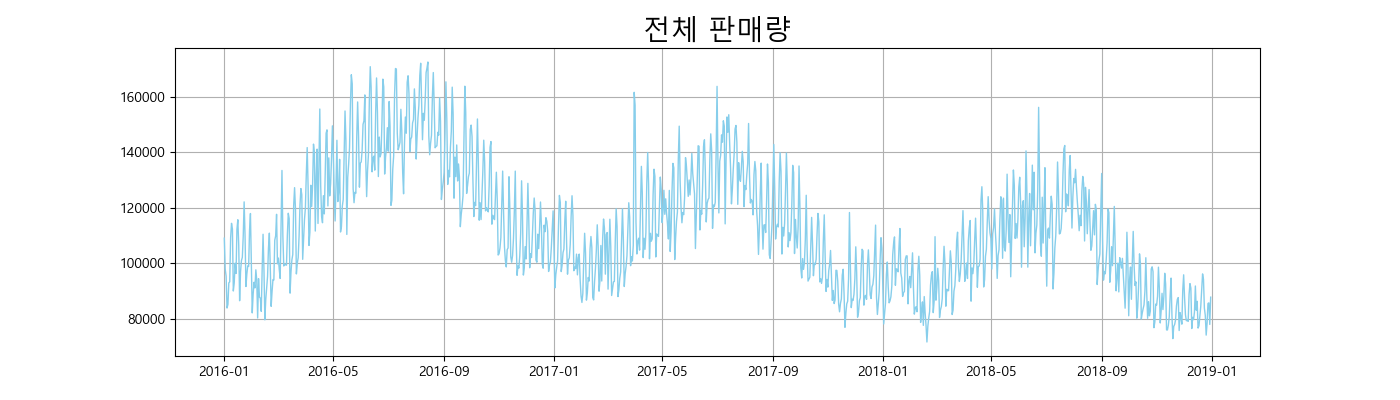

Text(0.5, 1.0, '전체 판매량')

In [8]:
gs_total=gs_seoul.groupby('date.gs')['qty.gs'].sum()
gs_seoul_date = pd.date_range(start='20160101',end='20181231')
plt.rcParams['axes.grid'] = True 
plt.rcParams["figure.figsize"] = (14,4)
plt.figure()
plt.plot(gs_seoul_date,gs_total,color='skyblue')
plt.title('전체 판매량',fontsize=20)

<IPython.core.display.Javascript object>


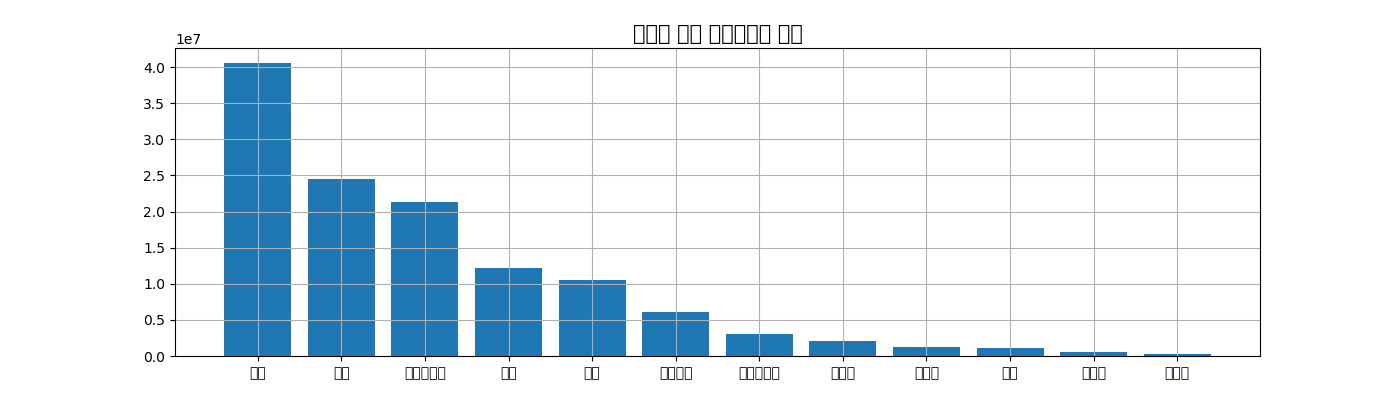

Text(0.5, 1.0, '편의점 전체 상품판매량 비중')

In [6]:
plt.figure()
gs_total=gs_seoul.groupby('cat.gs').sum().sort_values('qty.gs',ascending=False)
gs_total=gs_total.reset_index()
plt.bar(gs_total['cat.gs'],gs_total['qty.gs'])
plt.title('편의점 전체 상품판매량 비중',fontsize=15)

ppt) p5 

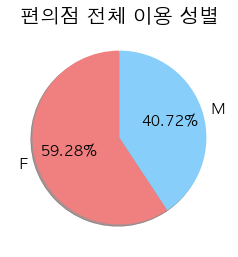

In [5]:
gs_total_gender=gs_seoul.groupby('gen.gs')['qty.gs'].sum()
group_names=gs_total_gender.index.tolist()
group_colors=['lightcoral','lightskyblue']
plt.rcParams["figure.figsize"] = (6,4)
plt.figure()
plt.pie(gs_total_gender,labels=group_names,colors=group_colors,
       shadow=True,startangle=90,textprops={'fontsize': 14},autopct='%1.2f%%')
plt.title('편의점 전체 이용 성별', fontsize=20)
plt.show()

<IPython.core.display.Javascript object>


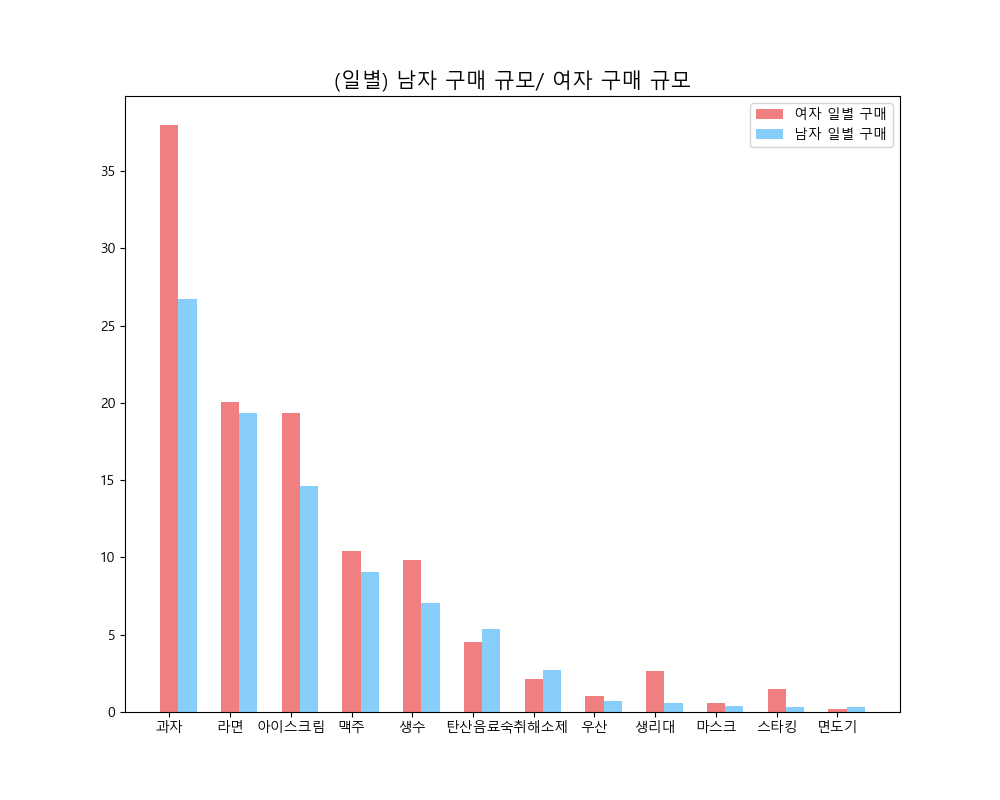

<function matplotlib.pyplot.show(*args, **kw)>

In [13]:
gs_seoul_male = gs_seoul[gs_seoul['gen.gs']=='M']
gs_seoul_female = gs_seoul[gs_seoul['gen.gs']=='F']
gs_seoul_male_sum = gs_seoul_male.groupby('cat.gs').sum().sort_values('qty.gs',ascending=False)
gs_seoul_female_sum = gs_seoul_female.groupby('cat.gs').sum().sort_values('qty.gs',ascending=False)
gs_seoul_sex_sum = pd.merge(gs_seoul_male_sum,gs_seoul_female_sum, on='cat.gs')
gs_seoul_sex_sum.columns=['male.qty','female.qty']
gs_seoul_sex_sum['남자 일별 구매'] = gs_seoul_sex_sum['male.qty'] / 577169
gs_seoul_sex_sum['여자 일별 구매'] = gs_seoul_sex_sum['female.qty'] / 663878
gs_seoul_sex_sum=gs_seoul_sex_sum.reset_index()
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['axes.grid'] = False
plt.figure()
x = np.arange(len(gs_seoul_sex_sum['cat.gs']))
plt.bar(x,gs_seoul_sex_sum['여자 일별 구매'],color='lightcoral',
        label='여자 일별 구매',width=0.3)
plt.bar(x+0.3,gs_seoul_sex_sum['남자 일별 구매'], color='lightskyblue',
        label='남자 일별 구매',width=0.3)
plt.xticks(x,gs_seoul_sex_sum['cat.gs'])
plt.title('(일별) 남자 구매 규모/ 여자 구매 규모',fontsize=15)
plt.legend()
plt.show

ppt) p6 

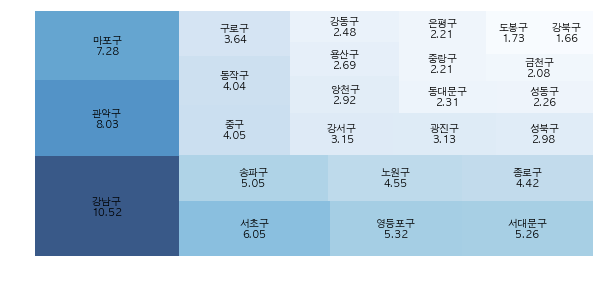

In [7]:
gs_cat=gs_seoul.groupby(['reg_02.gs']).sum()
gs_cat=gs_cat.reset_index()
gs_cat=gs_cat.sort_values('qty.gs',ascending=False)
gs_cat['%'] = round(gs_cat['qty.gs'] / gs_cat['qty.gs'].sum() * 100, 2)
norm = matplotlib.colors.Normalize(vmin=min(gs_cat['%']), vmax=max(gs_cat['%']))
colors = [matplotlib.cm.Blues(norm(value)) for value in gs_cat['%']]
plt.figure()
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 4.5)
squarify.plot(label=gs_cat['reg_02.gs'],sizes=gs_cat['%'], alpha=.8,color = colors,
             value=gs_cat['%'])
plt.axis('off')
plt.show()

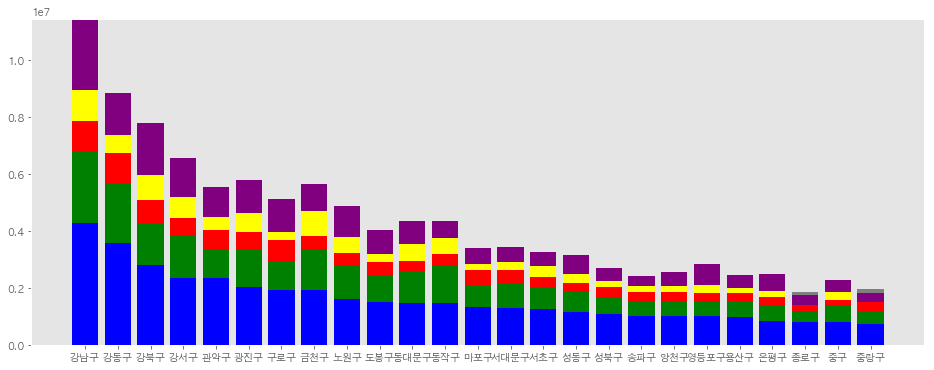

In [8]:
gs_region=gs_seoul.groupby(['reg_02.gs','cat.gs']).sum()
gs_region=gs_region.reset_index()
gs_region2=gs_region.copy()
gs_region2['qty.gs']=np.log(gs_region2['qty.gs'])
gs_region3=gs_region2.copy()
gs_region3=gs_region3.set_index(['cat.gs','reg_02.gs'])['qty.gs'].unstack()
gs_reg02=gs_region['reg_02.gs'].unique()
top3=pd.DataFrame([],columns=['reg_02.gs','cat.gs','qty.gs'])

for i in range(len(gs_reg02)):
    x=gs_region[gs_region['reg_02.gs']==gs_reg02[i]]
    y=x.sort_values('qty.gs',ascending=False).iloc[0:5,:]
    top3=top3.append(y)
top3_1=top3.set_index(['reg_02.gs','cat.gs'])['qty.gs'].unstack().sort_values(by = '과자',ascending = False)
top3_2=top3_1.fillna(0)
plt.rcParams["figure.figsize"] = (16,6)
plt.figure()

for i in range(len(gs_reg02)):
    plt.bar(gs_reg02[i],top3_2.iloc[i,0],label=top3_2.columns[0],color='blue')
    plt.bar(gs_reg02[i],top3_2.iloc[i,1],label=top3_2.columns[1],bottom=top3_2.iloc[i,0],color='green')
    plt.bar(gs_reg02[i],top3_2.iloc[i,2],label=top3_2.columns[2],bottom=sum(top3_2.iloc[i,0:2]),color='red')
    plt.bar(gs_reg02[i],top3_2.iloc[i,3],label=top3_2.columns[3],bottom=sum(top3_2.iloc[i,0:3]),color='yellow')
    plt.bar(gs_reg02[i],top3_2.iloc[i,4],label=top3_2.columns[4],bottom=sum(top3_2.iloc[i,0:4]),color='purple')
    plt.bar(gs_reg02[i],top3_2.iloc[i,5],label=top3_2.columns[5],bottom=sum(top3_2.iloc[i,0:5]),color='grey')

ppt) p7

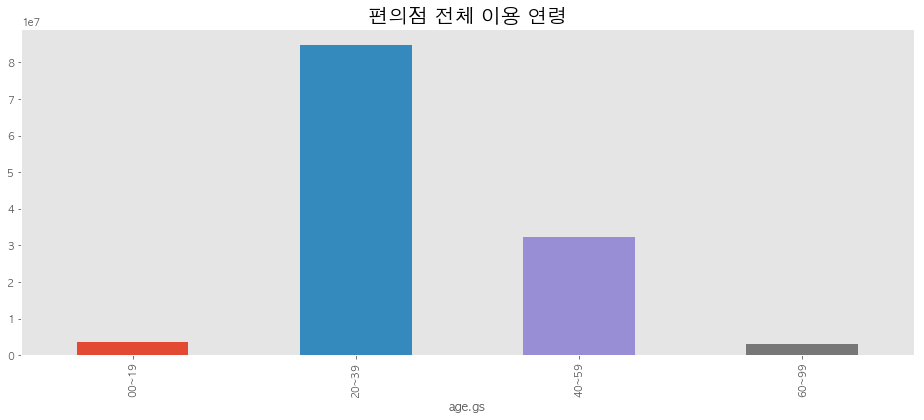

In [9]:
# 파이 그래프 이상해서 바그래프로 그렸습니다.
gs_total_age=gs_seoul.groupby('age.gs')['qty.gs'].sum().plot.bar()
plt.title('편의점 전체 이용 연령', fontsize=20)
plt.show()

<IPython.core.display.Javascript object>


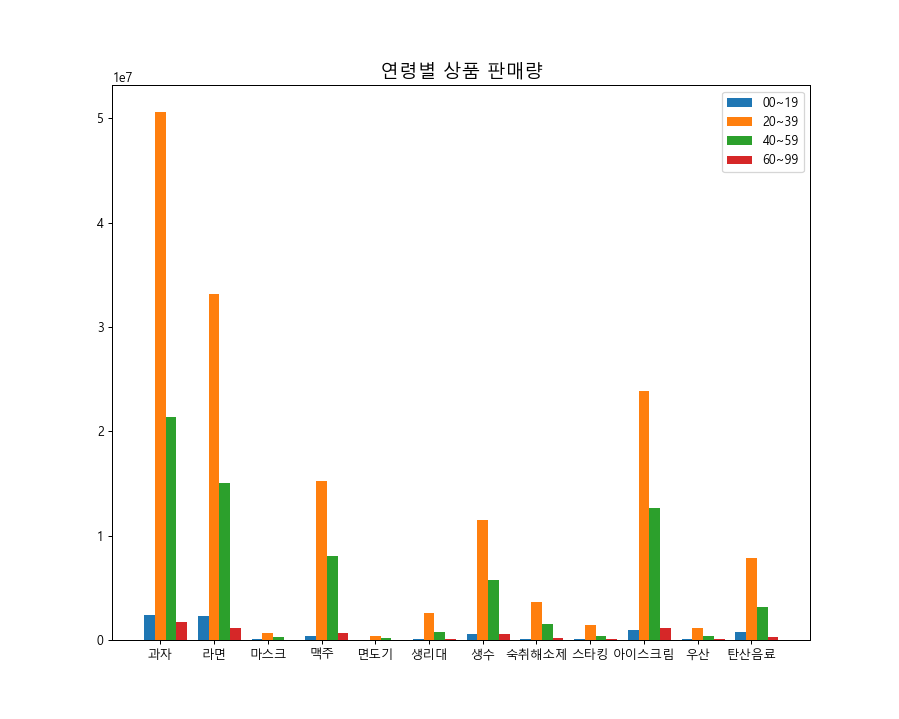

<function matplotlib.pyplot.show(*args, **kw)>

In [15]:
gs_cat_age=gs.groupby(['cat.gs','age.gs'])['qty.gs'].sum().unstack()
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
x = np.arange(len(gs_cat_age))
plt.bar(x-0.2,gs_cat_age['00~19'],
        label='00~19',width=0.2)
plt.bar(x,gs_cat_age['20~39'],
        label='20~39',width=0.2)
plt.bar(x+0.2,gs_cat_age['40~59'],
        label='40~59',width=0.2)
plt.bar(x+0.4,gs_cat_age['60~99'],
        label='60~99',width=0.2)
plt.xticks(x,gs_cat_age.index)
plt.title('연령별 상품 판매량',fontsize=15)
plt.legend()
plt.show

ppt) p8

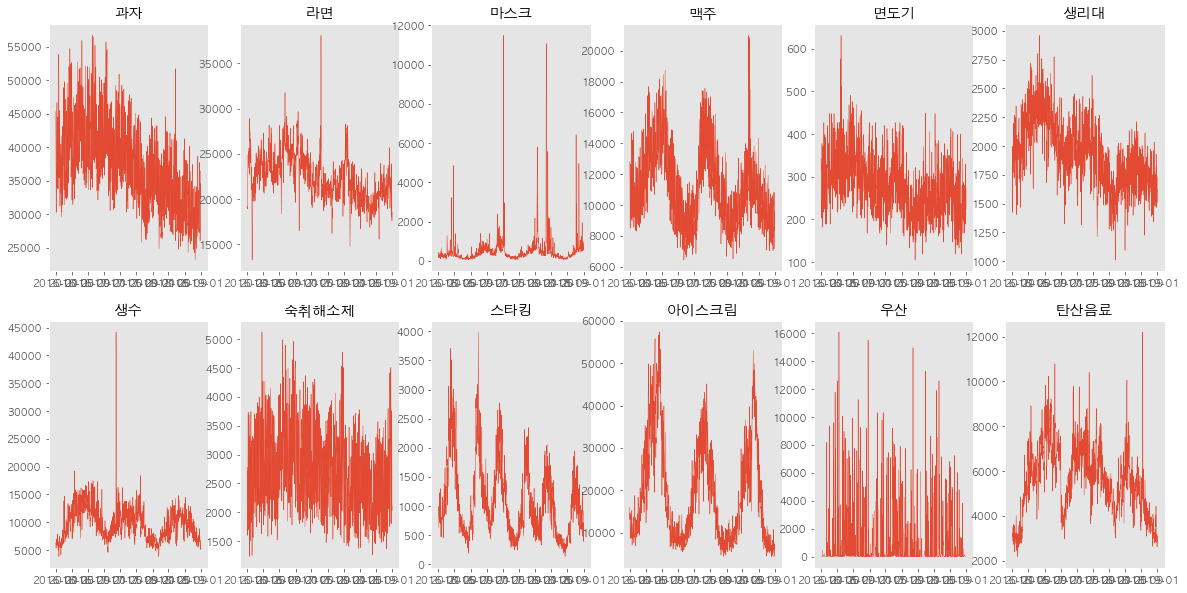

In [11]:
seoul_date_cat=gs_seoul.groupby(['date.gs','cat.gs']).sum()
seoul_date_cat1=seoul_date_cat.reset_index()
seoul_date_cat2=seoul_date_cat1.copy()
seoul_date_cat2=seoul_date_cat2.set_index(['date.gs','cat.gs'])['qty.gs'].unstack()
seoul_date_cat3=seoul_date_cat2.reset_index()

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 0.5
plt.figure()
cat=seoul_date_cat1['cat.gs'].unique().tolist()
for i in range(1,13):
    plt.subplot(2, 6, i)
    plt.title(cat[i-1])
    plt.plot(seoul_date_cat3['date.gs'],seoul_date_cat3.iloc[:,i])

ppt) p9

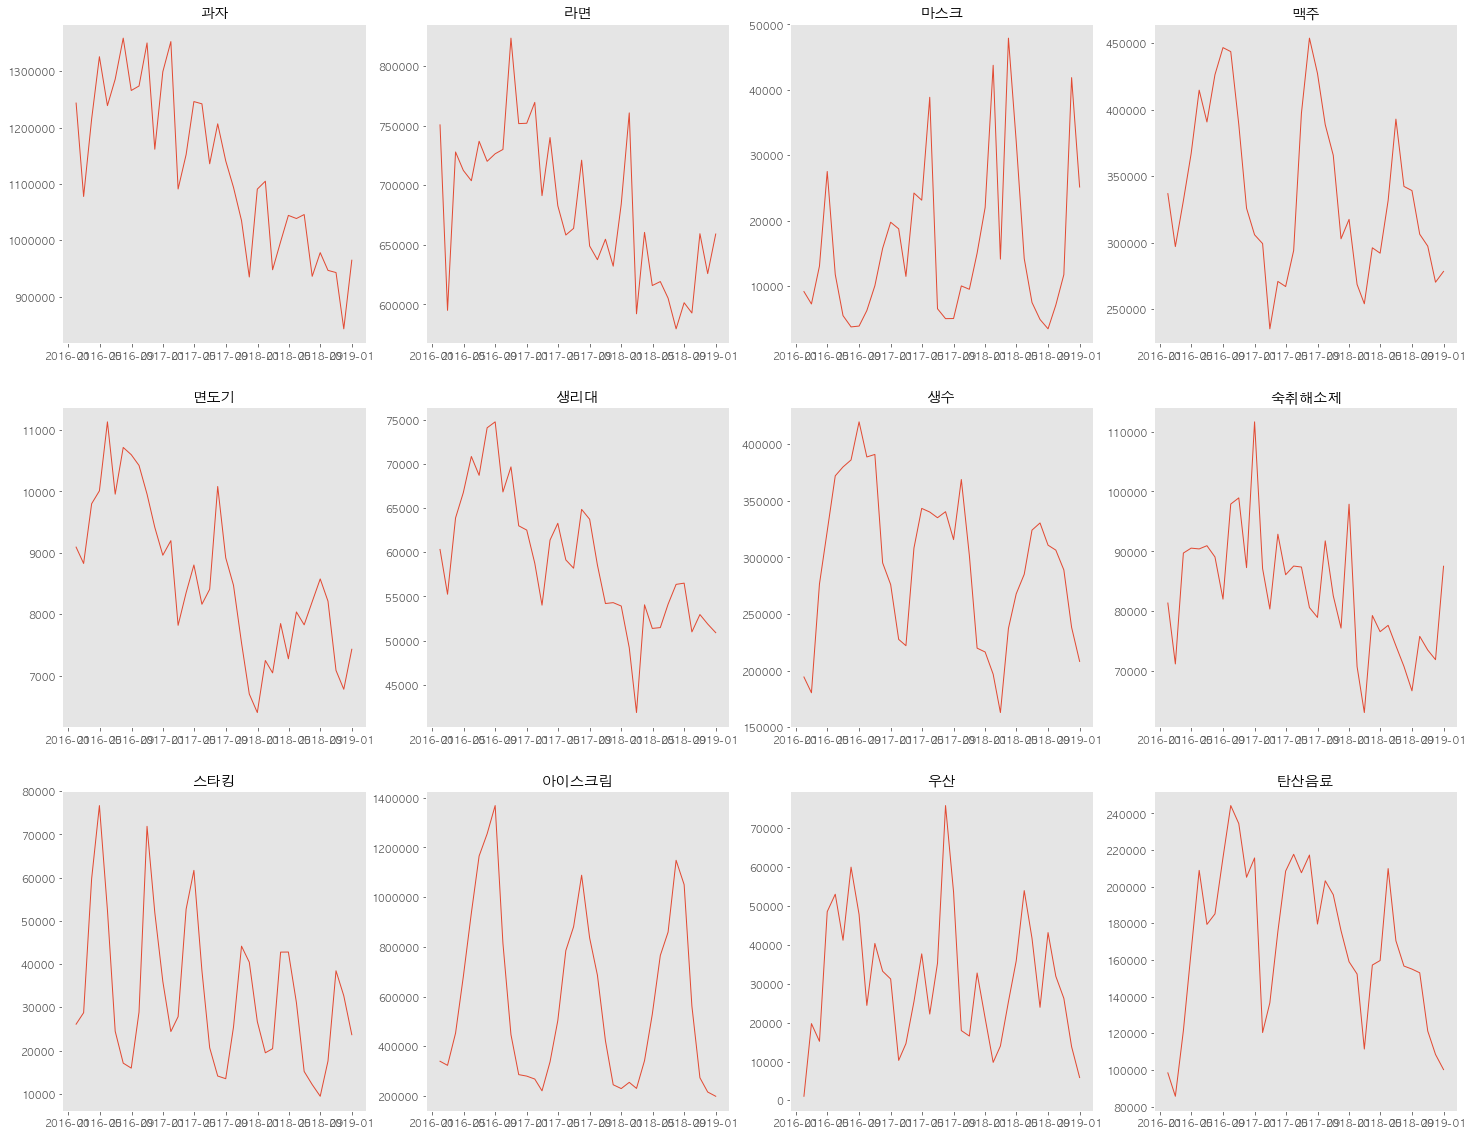

In [12]:
gs_month=gs_seoul.groupby(['date.gs','cat.gs']).sum()
gs_month2=gs_month.reset_index()
gs_month3=gs_month2.set_index(['date.gs','cat.gs'])['qty.gs'].unstack()
gs_month4=gs_month3.resample(rule='m').sum()
gs_month5=gs_month4.reset_index()

plt.rcParams['lines.linewidth'] = 1
plt.rcParams["figure.figsize"] = (25,20)
plt.figure()
cat=gs_month2['cat.gs'].unique().tolist()
for i in range(1,13):
    plt.subplot(3, 4, i)
    plt.title(cat[i-1])
    plt.plot(gs_month5['date.gs'],gs_month5.iloc[:,i])

ppt) p10

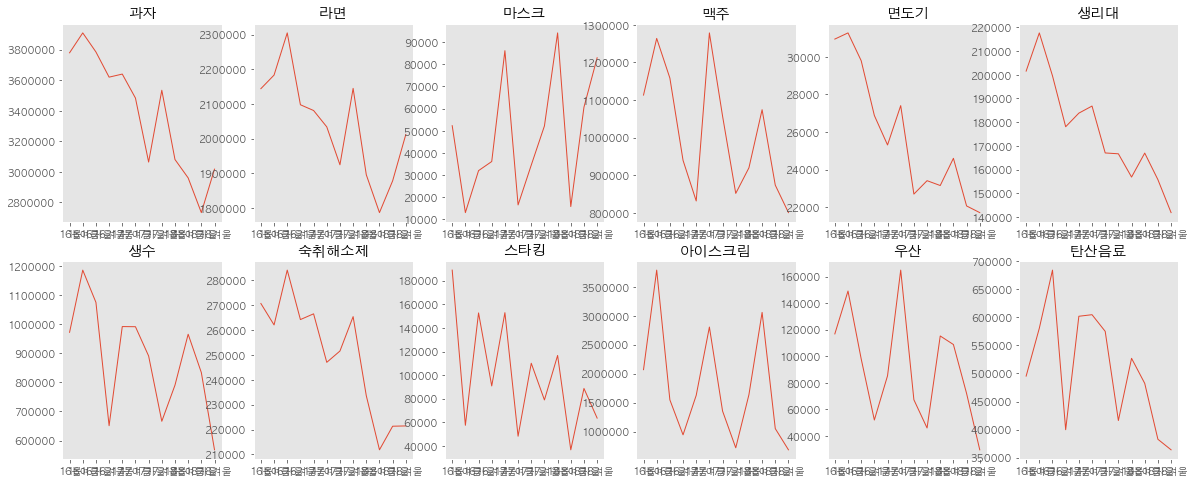

In [13]:
def separate_date(data):
    data["year"] = data["date.gs"].dt.year
    data["month"] = data["date.gs"].dt.month
    data["day"] = data["date.gs"].dt.day
    data["dayofweek"] = data["date.gs"].dt.dayofweek
separate_date(gs_seoul)
gs_seoul['year']=gs_seoul['year'].astype('str')
gs_seoul['month']=gs_seoul['month'].astype('str')
gs_seoul['day']=gs_seoul['day'].astype('str')
gs_seoul['dayofweek']=gs_seoul['dayofweek'].astype('str')

gs_season=gs_seoul.groupby(['year','month','cat.gs']).sum()
gs_season2=gs_season.reset_index()
gs_season_spring=gs_season2[(gs_season2['month']=='3')|(gs_season2['month']=='4')|(gs_season2['month']=='5')]
gs_season_spring['season']='0'
gs_season_summer=gs_season2[(gs_season2['month']=='6')|(gs_season2['month']=='7')|(gs_season2['month']=='8')]
gs_season_summer['season']='1'
gs_season_autumn=gs_season2[(gs_season2['month']=='9')|(gs_season2['month']=='10')|(gs_season2['month']=='11')]
gs_season_autumn['season']='2'
gs_season_winter=gs_season2[(gs_season2['month']=='12')|(gs_season2['month']=='1')|(gs_season2['month']=='2')]
gs_season_winter['season']='3'

gs_season3=pd.concat([gs_season_spring,gs_season_summer,gs_season_autumn,gs_season_winter])
gs_season3=gs_season3.reset_index(drop=True)
gs_season4=gs_season3.groupby(['year','season','cat.gs']).sum()
gs_season5=gs_season4.reset_index()
gs_season6=gs_season5[(gs_season5['cat.gs']=='과자')|(gs_season5['cat.gs']=='라면')|
                     (gs_season5['cat.gs']=='마스크')|(gs_season5['cat.gs']=='맥주')|
                     (gs_season5['cat.gs']=='면도기') | (gs_season5['cat.gs']=='생리대')|
                     (gs_season5['cat.gs']=='생수')|(gs_season5['cat.gs']=='숙취해소제')|
                     (gs_season5['cat.gs']=='스타킹')|(gs_season5['cat.gs']=='아이스크림')|
                     (gs_season5['cat.gs']=='우산')|(gs_season5['cat.gs']=='탄산음료')]
gs_season6['years']=gs_season6['year']+gs_season6['season']

plt.rcParams['lines.linewidth'] = 1
plt.rcParams["figure.figsize"] =(20,8)
colors=['red','blue','green','purple','orange']
xlabels=['16봄','16여름','16가을','16겨울','17봄','17여름','17가을','17겨울',
        '18봄','18여름','18가을','18겨울']
plt.figure()
for i in range(1,13):
    plt.subplot(2, 6, i)
    plt.title(cat[i-1])
    plt.plot(gs_season6[gs_season6['cat.gs']==cat[i-1]]['years'],
             gs_season6[gs_season6['cat.gs']==cat[i-1]]['qty.gs'],
             label=cat[i-1])
    plt.xticks(gs_season6[gs_season6['cat.gs']==cat[i-1]]['years'],xlabels)

ppt) p11

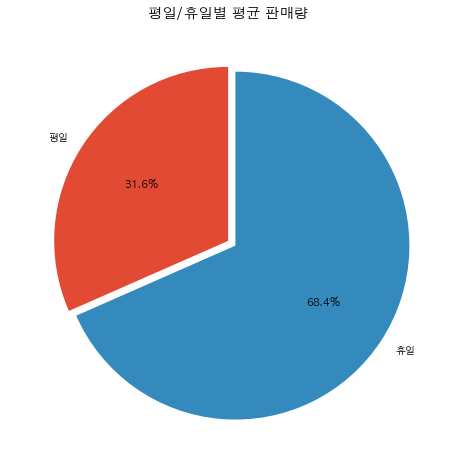

In [14]:
gs_seoul['year']=gs_seoul['year'].astype('int')
gs_seoul['month']=gs_seoul['month'].astype('int')
gs_seoul['day']=gs_seoul['day'].astype('int')
gs_seoul['dayofweek']=gs_seoul['dayofweek'].astype('int')

gs_seoul['year']=gs_seoul['year']
gs_seoul['month']=gs_seoul['month']
gs_seoul['day']=gs_seoul['day']
gs_seoul['dayofweek']=gs_seoul['dayofweek']
gs_seoul_day = gs_seoul[gs_seoul['dayofweek']<=3] # 평일(월~목) 전체 판매량
gs_seoul_end = gs_seoul[gs_seoul['dayofweek']>3] # 휴일(금~일) 전체 판매량

gs_seoul_day['qty.gs'].sum()/4
gs_seoul_end['qty.gs'].sum()/3

labels = ['평일', '휴일']
ratio = [gs_seoul_day['qty.gs'].sum()/5, gs_seoul_end['qty.gs'].sum()/2]
plt.pie(ratio, labels=labels, startangle=90, autopct='%1.1f%%', explode=(0, 0.05))
plt.title('평일/휴일별 평균 판매량')
plt.show()

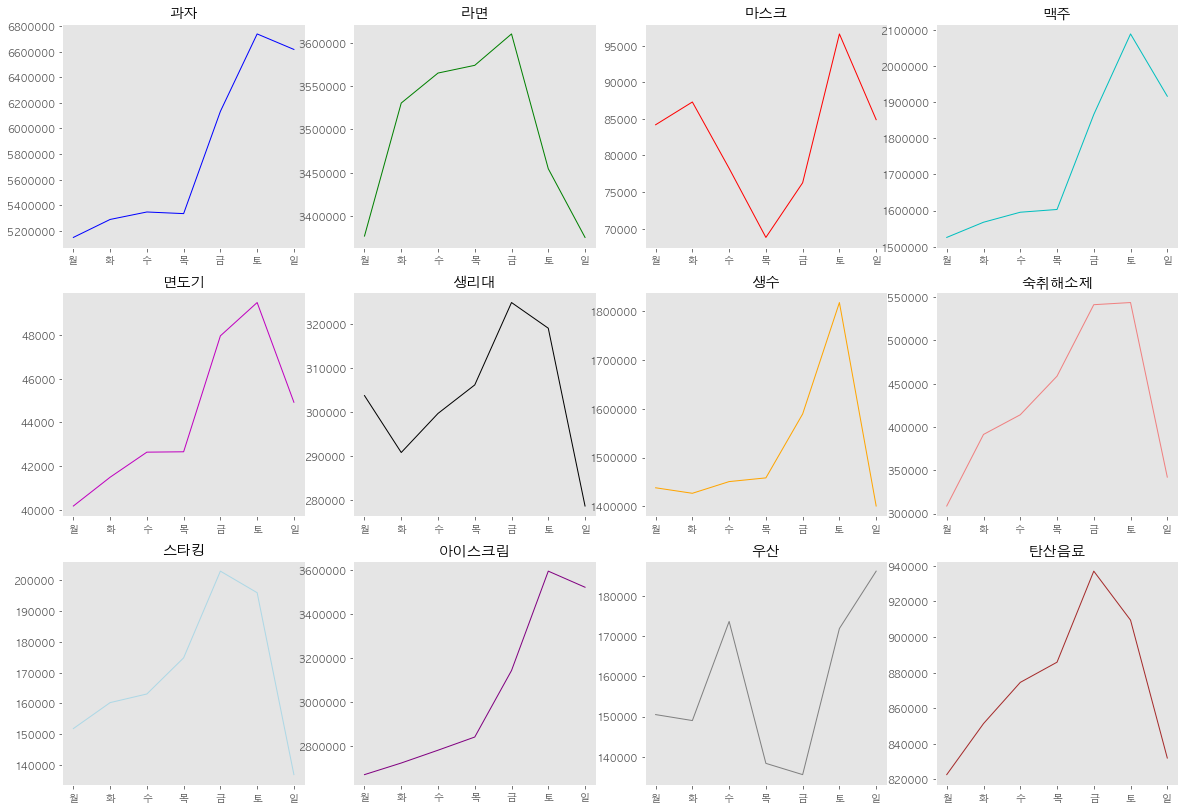

In [15]:
gs_seoul['year']=gs_seoul['year'].astype('str')
gs_seoul['month']=gs_seoul['month'].astype('str')
gs_seoul['day']=gs_seoul['day'].astype('str')
gs_seoul['dayofweek']=gs_seoul['dayofweek'].astype('str')

gs_week=gs_seoul.groupby(['cat.gs','dayofweek']).sum().reset_index()
plt.rcParams["figure.figsize"] = (20,14)
colors=['b','g','r','c','m','k','orange','lightcoral','lightblue','purple',
       'gray','brown']
xlabels=['월','화','수','목','금','토','일']
plt.figure()

cat=gs_week['cat.gs'].unique().tolist()
for i in range(1,len(cat)+1):
    plt.subplot(3, 4, i)
    plt.title(cat[i-1])
    plt.plot(gs_week[gs_week['cat.gs']==cat[i-1]]['dayofweek'],gs_week[gs_week['cat.gs']==cat[i-1]]['qty.gs'],
             color=colors[i-1])
    plt.xticks(gs_week[gs_week['cat.gs']==cat[i-1]]['dayofweek'],xlabels)

In [17]:
# 데이터 저장
gs_seoul.to_csv('/Users/hankiho/Desktop/gs_seoul.csv', index = False, encoding = "utf-8-sig")